In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/speech'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_speech_bertT_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_speech_bertT_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/BERT/Bert_SST/Bert_linear_speech/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1071,)

In [3]:
pred = old_prediction

In [4]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

571

# can find smallest k

In [5]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

571

In [6]:
np.mean(app_k_nonon)

238.88966725043784

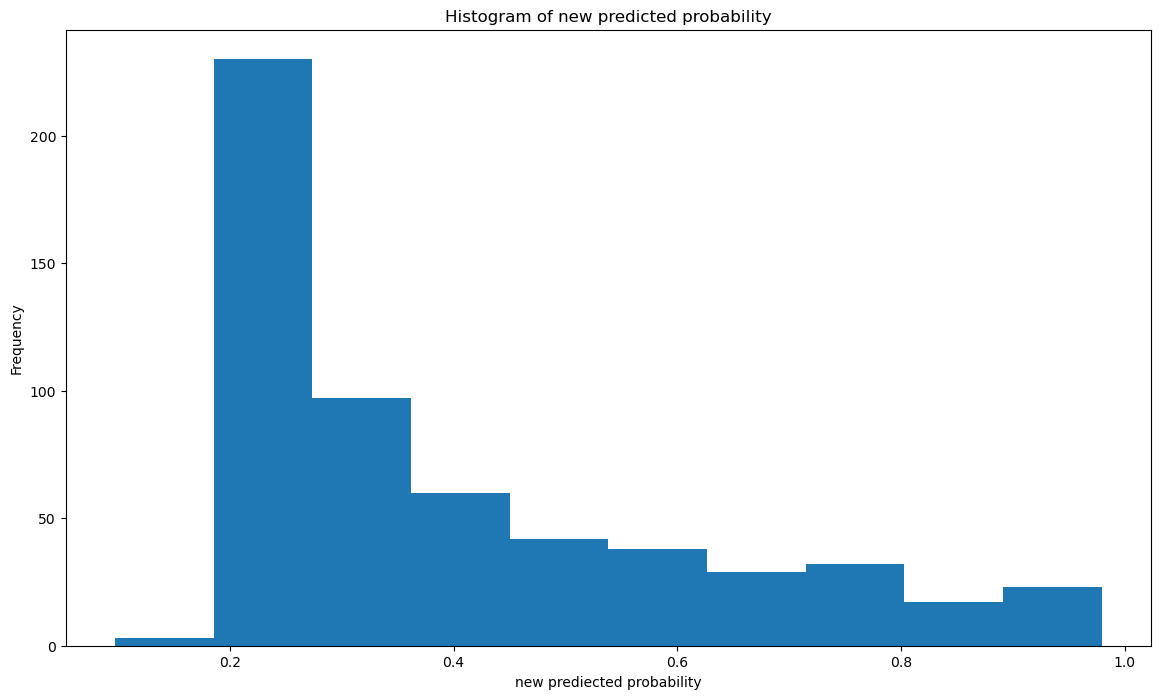

In [7]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

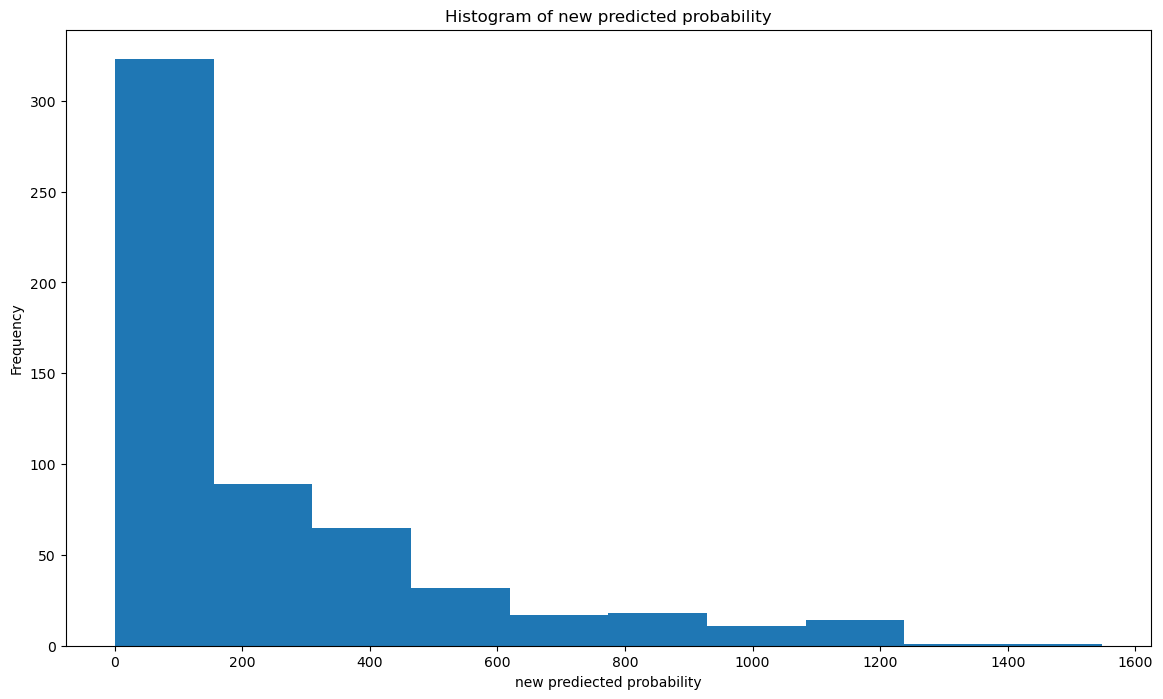

In [8]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [9]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(app_k.shape[0]):
    print("i", i)
    if app_k[i] != None:
        if (pred[i].item() > 0.25) != (new_pred_k[i].item() > 0.25):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.12870460406529613
new 0.30884246697180734
appro k 58
flip label [1.]

i 1
i 2
i 3
old 0.07828957443109545
new 0.5243631514553101
appro k 236
flip label [1.]

i 4
old 0.07740187553710691
new 0.5257677544428094
appro k 295
flip label [1.]

i 5
old 0.10602224455769423
new 0.37299394151472626
appro k 211
flip label [1.]

i 6
old 0.20135127970411712
new 0.2559236737379955
appro k 23
flip label [1.]

i 7
i 8
old 0.29092587846368706
new 0.2484688678846479
appro k 5
flip label [1.]

i 9
i 10
i 11
old 0.051877833478313734
new 0.7637753629763632
appro k 767
flip label [1.]

i 12
old 0.2209235878313831
new 0.2513857166183017
appro k 15
flip label [1.]

i 13
old 0.0927249172869682
new 0.43151776971276756
appro k 232
flip label [1.]

i 14
i 15
old 0.6172428366598401
new 0.24125015570439495
appro k 149
flip label [1.]

i 16
old 0.14434805923768557
new 0.28901427144798236
appro k 83
flip label [1.]

i 17
old 0.04563952998892577
new 0.8921331118575289
appro k 949
flip label [1.]

i 18
old 0.

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

466

In [11]:
app_k.shape

(1071,)

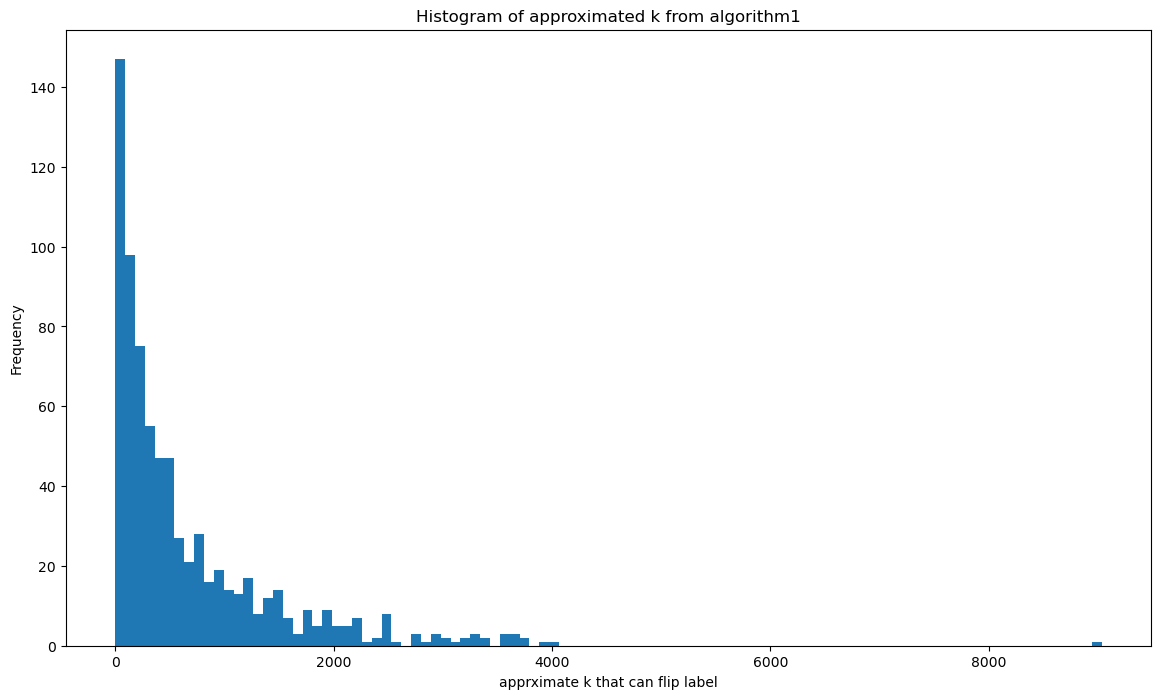

In [9]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

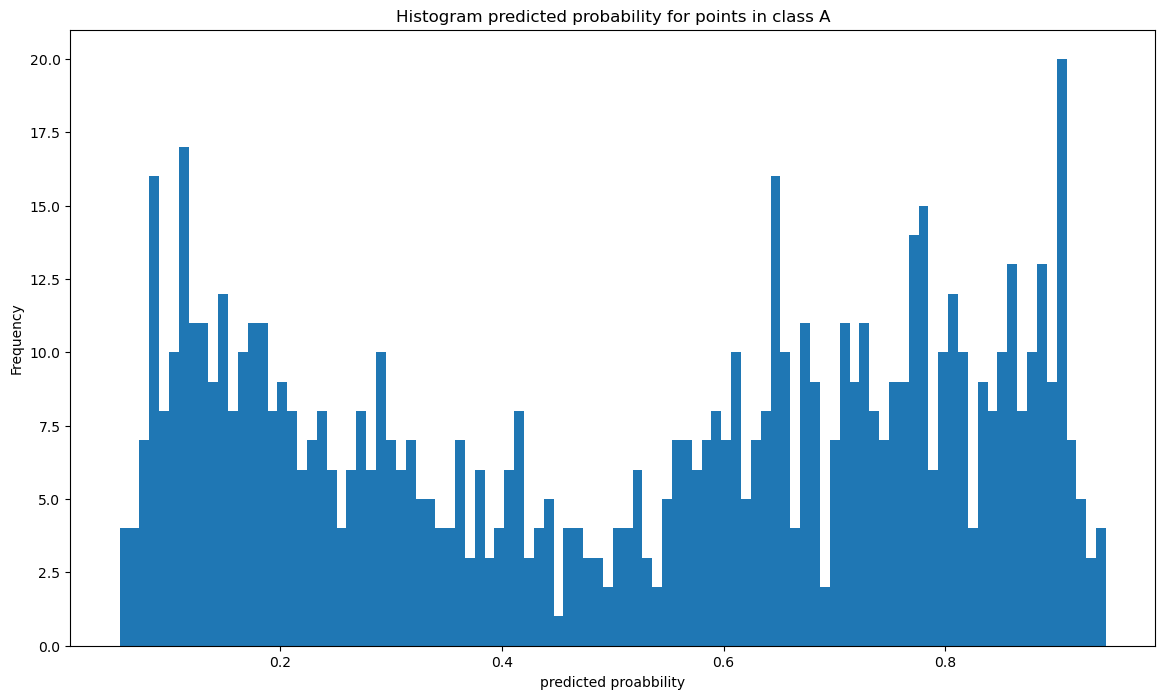

In [10]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [11]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

156

In [12]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.21799582307459964, 0.028943240879455694)

In [13]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.04435991288959612, 0.0015243265993027404)